In [ ]:
! pip install Pillow==5.3.0

     |████████████████████████████████| 2.0MB 5.0MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [ ]:
import torch 
print('torch version: ', torch.__version__)
import PIL
import PIL
print(PIL.PILLOW_VERSION)
print('pillow version: ', PIL.PILLOW_VERSION)

torch version:  1.6.0+cu101
5.3.0
pillow version:  5.3.0


In [ ]:
import time 
import copy
from PIL import Image
import numpy as np
import torch.nn.functional as F
from torch.autograd import Variable
from torch import nn, optim
from torch.optim import lr_scheduler
from torchvision import transforms , models, datasets
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import numpy as np

import timeit

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
train_dir = 'gdrive/My Drive/banana/data1/train'
#test_dir = 'gdrive/My Drive/banana/data1/test'
val_dir = 'gdrive/My Drive/banana/data1/valid'

dirs = {'train': train_dir,
        #'test': test_dir,
        'val' : val_dir
        }

In [ ]:
USE_GPU = True

dtype = torch.float32 # we will be using float 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
    dtype = torch.cuda.FloatTensor
    
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device,'dtype:',dtype)

NameError: ignored

In [ ]:
test' : transforms.Compose([
        transforms.Resize((256,256)),
        transforms.CenterCrop(224),                       
        transforms.ToTensor(),
        #transforms.Normalize([0.6462, 0.6337, 0.4245],
                            # [0.2954,  0.2800, 0.3538])   
        #transforms.Normalize([0.5317,0.5194,0.3677],[0.1899,0.1937,0.2299])                          
    ])

In [ ]:
# add transforms to the data
data_transforms = {
    'train' : transforms.Compose([
        transforms.Resize((256,256)),
        transforms.CenterCrop(224),
        #transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation((15,60), resample=PIL.Image.BILINEAR),                         
        transforms.ToTensor(),
        #transforms.Normalize([0.6462, 0.6337, 0.4245],
        #                     [0.2954,  0.2800, 0.3538]) 
       # transforms.Normalize([0.5317,0.5194,0.3677],[0.1899,0.1937,0.2299])                            
    ]),
    'val' : transforms.Compose([
        transforms.Resize((256,256)), 
        #transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation((15,60), resample=PIL.Image.BILINEAR),                          
        transforms.ToTensor(),
        #transforms.Normalize([0.6462, 0.6337, 0.4245],
                            # [0.2954,  0.2800, 0.3538])   
        #transforms.Normalize([0.5317,0.5194,0.3677],[0.1899,0.1937,0.2299])                          
    ])
}

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
#number of subprocessors to use for data loading
num_workers = 0
#number of samples per batch to load
batch_size = 4
# percentage to training data to use as validation
valid_size = 0.2
#removed the validation set to use sampler
image_datasets = {x: datasets.ImageFolder(dirs[x],   transform = data_transforms[x])  for x in ['train','val']}
classes = image_datasets['val'].classes
print(classes)
print(image_datasets)

['green', 'overripe', 'ripe']
{'train': Dataset ImageFolder
    Number of datapoints: 409
    Root location: gdrive/My Drive/banana/data1/train
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=(15, 60), resample=2, expand=False)
               ToTensor()
           ), 'val': Dataset ImageFolder
    Number of datapoints: 72
    Root location: gdrive/My Drive/banana/data1/valid
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=(15, 60), resample=2, expand=False)
               ToTensor()
           )}


In [ ]:
# obtain training indices that will be used for validation
from torch.utils.data.sampler import SubsetRandomSampler
image_datasets = {x:datasets.ImageFolder(dirs[x],  transform = data_transforms[x]) for x in ['train',  'val']}
#load the data into batches
batch_size = 4
train_loader = torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size,shuffle=True)
#test_loader = torch.utils.data.DataLoader(image_datasets['test'], batch_size=batch_size,shuffle=True)
val_loader = torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size,shuffle=True)
num_train = len(image_datasets['train'])
num_val = len(image_datasets['val'])
#num_test = len(image_datasets['test'])

print('length of train loader' , len(train_loader))
#print('length of test loader' , len(test_loader))
print('length of validation loader' , len(val_loader))


length of train loader 103
length of validation loader 18


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

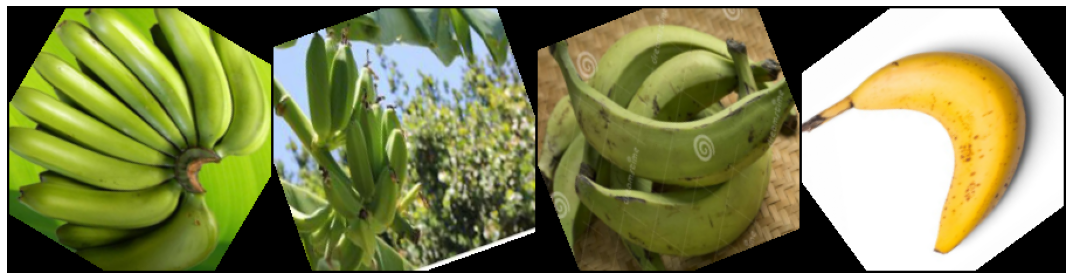

In [ ]:
import torchvision
import matplotlib.pyplot as plt

def imshow(image):
  if isinstance(image, torch.Tensor):
    image = image.numpy().transpose((1,2,0))
  else :
    image = np.array(image).transpose((1,2,0))

    
 
  image = np.clip(image, 0, 1)
  # Plot
  fig, ax = plt.subplots(1, 1, figsize = (15, 15))
  plt.imshow(image)
  ax.axis('off')

images,_ = next(iter(train_loader)) 
print(images)
out = torchvision.utils.make_grid(images, nrow = 8)
print(out.shape)
imshow(out) 
plt.gcf().tight_layout()

In [ ]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

In [ ]:
def reset(m):
  if hasattr(m,'reset_parameters'):
    m.reset_parameters()

In [ ]:
def check_accuracy(model, loader):
    
    if loader==val_loader:
        print('Checking accuracy on validation set')
    elif( loader==train_loader):
          print('Checking accuracy on train set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    for x, y in loader:
        x=x.to(device)
        y=y.to(device)
        x_var = Variable(x.type(dtype))

        scores = model(x_var)

        # _, preds = scores.data.cpu().max(1)
        _, preds = scores.max(1)
        num_correct += (preds == y).sum()
        #if(!(preds==y)):
        #if(loader==valid_loader):
        #  print(scores.data,preds,y_var)
        '''if (loader==test_loader):
          
          print('predicted :',preds ,'ground truth : ' ,y)
          out = torchvision.utils.make_grid(x, nrow = 8)
          imshow(out)
        #imshow(x)'''

        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
    return acc*100 

In [ ]:
def check_acc_mti(model,loader):
  num_correct = 0
  model.eval()
  for x,y in loader:
    x=x.to(device)
    y=y.to(device)
    x_var = Variable(x.type(dtype))
    x_plot = x_var.cpu().numpy()

    scores = model(x_var)
    _, preds = scores.max(1)
    num_correct += (preds == y).sum()
    for i in range(4):
      if preds[i]!=y[i]:
         plt.imshow(x_plot[i])
         plt.show
  print('acc:',num_correct)


In [ ]:
def train(model, loss_fn, optimizer, num_epochs = 1,print_every=4,val_acc=True,test_acc=True,train_acc=True):
    best_model = None
    best_accuracy = 0
    losses=[]
    val_accs=[]
    train_accs=[]
    for epoch in range(num_epochs):
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))
        running_loss=0
        model.train()
        for t, (x, y) in enumerate(train_loader):
            x=x.to(device)
            y=y.to(device)
            x_var = Variable(x.type(dtype))
            y_var = Variable(y.type(dtype).long())

            scores = model(x_var)
            
            loss = loss_fn(scores, y_var)
            

            optimizer.zero_grad()
            loss.backward()
            with torch.no_grad():
              optimizer.step()
            running_loss+= loss
        epoch_loss = running_loss/len(train_loader)
        losses.append(epoch_loss)
        if (val_acc):
          val_acc = check_accuracy(model,val_loader)
          val_accs.append(val_acc)
          if val_acc>best_accuracy:
            best_accuracy = val_acc
            best_model =copy.deepcopy(model)
        if(test_acc):
          test_acc=check_accuracy(model,test_loader)    
        if(train_acc):
          train_acc=check_accuracy(model,train_loader)
          train_accs.append(train_acc)
        print('  ')  
        if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f' % (t + 1, loss),'val acc:',val_acc,'train acc:',train_acc)
    plt.subplot(2, 1, 1)
    plt.title('acc')
    plt.plot(train_accs)
    plt.plot(val_accs)
    plt.xlabel('epoch')
    plt.legend(loc='lower right')
    plt.gcf().set_size_inches(15, 12)
    plt.show()
    
    return(best_model,best_accuracy)
            

#nn.Dropout(p=0.5),
    #nn.Linear(50,10)

In [ ]:
channel1=64
channel2=32
channel3=16
kernel_size=3
model1= nn.Sequential(
    nn.Conv2d(3,channel1,kernel_size,stride=1,padding=1),
    nn.BatchNorm2d(channel1,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.Conv2d(channel1,channel1,kernel_size,stride=1,padding=1),
    nn.BatchNorm2d(channel1,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.AvgPool2d(3,stride=1,padding=0),
    Flatten(),
    nn.Linear(channel2*254*510,100),
    nn.Dropout(p=0.5),
    nn.Linear(100,10)
    

)


In [ ]:
channel1=64
channel2=32
channel3=16
kernel_size=5
model= nn.Sequential(
    nn.Conv2d(3,channel1,kernel_size,stride=1,padding=0),
    nn.BatchNorm2d(channel1,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.Conv2d(channel1,channel1,kernel_size,stride=1,padding=0),
    nn.BatchNorm2d(channel1,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.AvgPool2d(2,stride=2,padding=0),
    nn.Conv2d(channel1,channel2,kernel_size,stride=1,padding=0),
    nn.BatchNorm2d(channel2,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.Conv2d(channel2,channel2,kernel_size,stride=1,padding=0),
    nn.BatchNorm2d(channel2,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.AvgPool2d(2,stride=2,padding=0),
    nn.Conv2d(channel2,channel3,kernel_size,stride=1,padding=0),
    nn.BatchNorm2d(channel3,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.Conv2d(channel3,channel3,kernel_size,stride=1,padding=0),
    nn.BatchNorm2d(channel3,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.AvgPool2d(2,stride=2,padding=0),
    Flatten(),
    #nn.Linear(channel3*57*57,100),
    nn.Linear(10000,100),
    nn.Dropout(p=0.5),
    nn.Linear(100,50),
    nn.Dropout(p=0.5),
    nn.Linear(50,10)

)


In [ ]:
'''nn.Conv2d(channel2,channel3,kernel_size,stride=1,padding=0),
    nn.BatchNorm2d(channel3,eps=1e-6,momentum=0.1),
    nn.PReLU(),
    nn.Conv2d(channel3,channel3,kernel_size,stride=1,padding=0),
    nn.BatchNorm2d(channel3,eps=1e-6,momentum=0.1),
    nn.PReLU(),
    nn.AvgPool2d(2,stride=2,padding=0),'''

In [ ]:
channel1=64
channel2=32
channel3=16
kernel_size=5
model2= nn.Sequential(
    nn.Conv2d(3,32,3,stride=1,padding=0),
    nn.BatchNorm2d(32,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.Conv2d(32,64,3,stride=1,padding=0),
    nn.BatchNorm2d(64,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.MaxPool2d(3,stride=1,padding=0),
    nn.Conv2d(64,128,3,stride=1,padding=0),
    nn.BatchNorm2d(128,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.Conv2d(128,64,5,stride=1,padding=0),
    nn.BatchNorm2d(64,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.MaxPool2d(3,stride=1,padding=0),
    nn.Conv2d(64,32,5,stride=1,padding=0),
    nn.BatchNorm2d(32,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.Conv2d(32,16,5,stride=1,padding=0),
    nn.BatchNorm2d(16,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.MaxPool2d(3,stride=1,padding=0),
    Flatten(),
    nn.Linear(861184,100),
    nn.PReLU(),
    #nn.Linear(16*230*230,100),
    #nn.Linear(10000,100),
    nn.Dropout(p=0.5),
    nn.Linear(100,50),
    nn.PReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(50,10)

)


In [ ]:
dtype= torch.cuda.FloatTensor

In [ ]:
t1=time.time()
my_model2 = model2.type(dtype)
loss_fn = nn.CrossEntropyLoss().type(dtype)
optimizer=optim.Adam(my_model2.parameters(), lr = 1e-5,weight_decay = 0.0)
my_model2.apply(reset)
best_model2,best_acc2=train(my_model2,loss_fn,optimizer,num_epochs=20,print_every=6,test_acc=False)
t2=time.time()
print((t2-t1)/60)
print(id(best_model2), id(model2))

Starting epoch 1 / 20
Checking accuracy on validation set
Got 42 / 60 correct (70.00)
Checking accuracy on train set
Got 185 / 248 correct (74.60)
  
Starting epoch 2 / 20
Checking accuracy on validation set
Got 52 / 60 correct (86.67)
Checking accuracy on train set
Got 234 / 248 correct (94.35)
  
Starting epoch 3 / 20
Checking accuracy on validation set
Got 53 / 60 correct (88.33)
Checking accuracy on train set
Got 233 / 248 correct (93.95)
  
Starting epoch 4 / 20
Checking accuracy on validation set
Got 49 / 60 correct (81.67)
Checking accuracy on train set
Got 236 / 248 correct (95.16)
  
Starting epoch 5 / 20
Checking accuracy on validation set
Got 51 / 60 correct (85.00)
Checking accuracy on train set
Got 237 / 248 correct (95.56)
  
Starting epoch 6 / 20
Checking accuracy on validation set
Got 53 / 60 correct (88.33)
Checking accuracy on train set
Got 237 / 248 correct (95.56)
  
Starting epoch 7 / 20
Checking accuracy on validation set
Got 55 / 60 correct (91.67)
Checking accur

In [ ]:
check_acc_mti(best_model2,mti_loader)

TypeError: ignored

In [ ]:
check_accuracy(best_model2,test_loader)

Checking accuracy on test set
Got 35 / 40 correct (87.50)


87.5

In [ ]:
PATH = 'gdrive/My Drive/itsp project/banana/trained_params2.pt'
torch.save(best_model2.state_dict(),PATH)

Starting epoch 1 / 100
Checking accuracy on validation set
Got 40 / 60 correct (66.67)
Checking accuracy on train set
Got 160 / 248 correct (64.52)
  
Starting epoch 2 / 100
Checking accuracy on validation set
Got 43 / 60 correct (71.67)
Checking accuracy on train set
Got 174 / 248 correct (70.16)
  
Starting epoch 3 / 100
Checking accuracy on validation set
Got 46 / 60 correct (76.67)
Checking accuracy on train set
Got 196 / 248 correct (79.03)
  
Starting epoch 4 / 100
Checking accuracy on validation set
Got 51 / 60 correct (85.00)
Checking accuracy on train set
Got 210 / 248 correct (84.68)
  
Starting epoch 5 / 100
Checking accuracy on validation set
Got 50 / 60 correct (83.33)
Checking accuracy on train set
Got 206 / 248 correct (83.06)
  
Starting epoch 6 / 100
Checking accuracy on validation set
Got 50 / 60 correct (83.33)
Checking accuracy on train set
Got 212 / 248 correct (85.48)
  
Starting epoch 7 / 100
Checking accuracy on validation set
Got 51 / 60 correct (85.00)
Checkin

ValueError: ignored

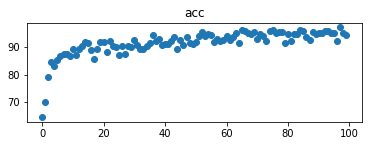

In [ ]:
t1=time.time()
my_model = model.type(dtype)
loss_fn = nn.CrossEntropyLoss().type(dtype)
optimizer=optim.Adam(my_model.parameters(), lr = 1e-5,weight_decay = 0.0)
my_model.apply(reset)
best_model,best_acc=train(my_model,loss_fn,optimizer,num_epochs=100,print_every=6,test_acc=False)
t2=time.time()
print((t2-t1)/60)
print(id(best_model), id(model))

In [ ]:
PATH = 'gdrive/My Drive/itsp project/banana/trained_params.pt'
torch.save(best_model.state_dict(),PATH)

In [ ]:
PATH = 'gdrive/My Drive/itsp project/banana/trained_params.pt'
model_retained= model.type(dtype)
model_retained.load_state_dict(torch.load(PATH))
model.eval

<bound method Module.eval of Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): PReLU(num_parameters=1)
  (3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): PReLU(num_parameters=1)
  (6): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (7): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1))
  (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): PReLU(num_parameters=1)
  (10): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): PReLU(num_parameters=1)
  (13): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (14): Conv2d(32, 16, kernel_size=(5, 5), stride=(1, 1))
  (15): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1

In [ ]:
check_accuracy(model_retained,test_loader)

Checking accuracy on test set


RuntimeError: ignored

In [ ]:
check_acc_mti(best_model,mti_loader)

acc: tensor(1, device='cuda:0')


In [ ]:
channel1=64
channel2=32
channel3=16
kernel_size=5
model3= nn.Sequential(
    nn.Conv2d(3,32,3,stride=1,padding=0),
    nn.BatchNorm2d(32,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.Conv2d(32,64,3,stride=1,padding=0),
    nn.BatchNorm2d(64,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.MaxPool2d(3,stride=1,padding=0),
    nn.Conv2d(64,128,3,stride=1,padding=0),
    nn.BatchNorm2d(128,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.Conv2d(128,64,5,stride=1,padding=0),
    nn.BatchNorm2d(64,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.MaxPool2d(3,stride=1,padding=0),
    nn.Conv2d(64,32,5,stride=1,padding=0),
    nn.BatchNorm2d(32,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.Conv2d(32,16,5,stride=1,padding=0),
    nn.BatchNorm2d(16,eps=1e-5,momentum=0.1),
    nn.PReLU(),
    nn.MaxPool2d(3,stride=1,padding=0),
    Flatten(),
    nn.Linear(861184,100),
    nn.PReLU(),
    #nn.Linear(16*230*230,100),
    #nn.Linear(10000,100),
    nn.Dropout(p=0.5),
    nn.Linear(100,50),
    nn.PReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(50,10)

)


Starting epoch 1 / 20
Checking accuracy on validation set
Got 50 / 60 correct (83.33)
Checking accuracy on train set
Got 206 / 248 correct (83.06)
  
Starting epoch 2 / 20
Checking accuracy on validation set
Got 53 / 60 correct (88.33)
Checking accuracy on train set
Got 210 / 248 correct (84.68)
  
Starting epoch 3 / 20
Checking accuracy on validation set
Got 56 / 60 correct (93.33)
Checking accuracy on train set
Got 223 / 248 correct (89.92)
  
Starting epoch 4 / 20
Checking accuracy on validation set
Got 56 / 60 correct (93.33)
Checking accuracy on train set
Got 218 / 248 correct (87.90)
  
Starting epoch 5 / 20
Checking accuracy on validation set
Got 55 / 60 correct (91.67)
Checking accuracy on train set
Got 218 / 248 correct (87.90)
  
Starting epoch 6 / 20
Checking accuracy on validation set
Got 55 / 60 correct (91.67)
Checking accuracy on train set
Got 220 / 248 correct (88.71)
  
Starting epoch 7 / 20
Checking accuracy on validation set
Got 56 / 60 correct (93.33)
Checking accur

ValueError: ignored

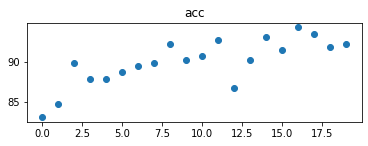

In [ ]:
t1=time.time()
my_model3 = model3.type(dtype)
loss_fn3 = nn.CrossEntropyLoss().type(dtype)
optimizer3=optim.Adam(my_model3.parameters(), lr = 1e-5,weight_decay = 0.0)
my_model3.apply(reset)
best_model3,best_acc3=train(my_model3,loss_fn3,optimizer3,num_epochs=20,print_every=6,test_acc=False)
t2=time.time()
print((t2-t1)/60)
print(id(best_model3), id(model3))

In [ ]:
import torchvision.models as models

In [ ]:
model_new = models.resnet18(pretrained=False)
model_new.fc = nn.Linear(512,3)
#model_new.fc = nn.Linear(2048,3)
model_new.cuda(device=device)
print(device)

cuda


Starting epoch 1 / 100
Checking accuracy on validation set
Got 63 / 72 correct (87.50)
Checking accuracy on train set
Got 360 / 409 correct (88.02)
  
Starting epoch 2 / 100
Checking accuracy on validation set
Got 67 / 72 correct (93.06)
Checking accuracy on train set
Got 374 / 409 correct (91.44)
  
Starting epoch 3 / 100
Checking accuracy on validation set
Got 65 / 72 correct (90.28)
Checking accuracy on train set
Got 375 / 409 correct (91.69)
  
Starting epoch 4 / 100
Checking accuracy on validation set
Got 65 / 72 correct (90.28)
Checking accuracy on train set
Got 379 / 409 correct (92.67)
  
Starting epoch 5 / 100
Checking accuracy on validation set
Got 68 / 72 correct (94.44)
Checking accuracy on train set
Got 389 / 409 correct (95.11)
  
Starting epoch 6 / 100
Checking accuracy on validation set
Got 67 / 72 correct (93.06)
Checking accuracy on train set
Got 389 / 409 correct (95.11)
  
Starting epoch 7 / 100
Checking accuracy on validation set
Got 66 / 72 correct (91.67)
Checkin

No handles with labels found to put in legend.


Got 407 / 409 correct (99.51)
  


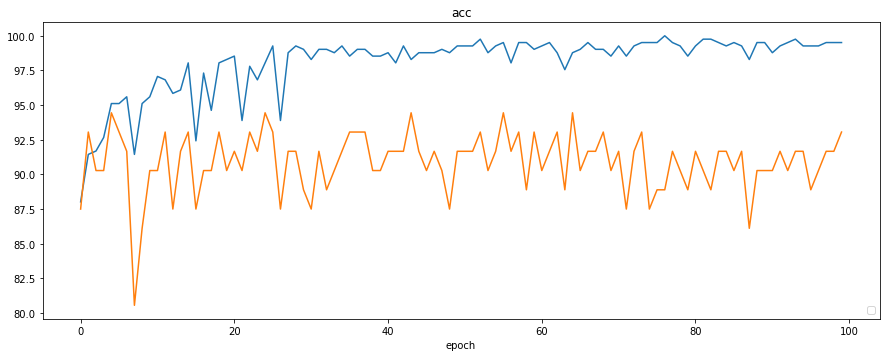

49.78753112157186
94.44444444444444


In [ ]:
t1=time.time()
my_model = model_new.type(dtype)
loss_fn = nn.CrossEntropyLoss().type(dtype)
#optimizer3=optim.Adam(my_model3.parameters(), lr = 1e-4,weight_decay = 0.0)
optimizer = optim.Adam(my_model.parameters(), lr = 1e-5,weight_decay = 0.0)
my_model.apply(reset)
best_model,best_acc = train(my_model,loss_fn,optimizer,num_epochs=100,print_every=6,test_acc=False)
t2=time.time()
print((t2-t1)/60)
print(best_acc)
#print(id(best_model), id(model))

In [ ]:
PATH1 = 'gdrive/My Drive/itsp project/banana/trained_params_new.pt'
torch.save(best_model.state_dict(),PATH1)